## Environment Setup

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

## Datasets

In [2]:
df = pd.read_csv('./raw_data/autos_nach_kraftstoff.csv',sep=',')
df.head(30)

,fuel_type,pkw,total,year
0,Benzin,"31,435,340","36,397,643",2021
1,Diesel,"15,060,124","20,771,561",2021
2,Gas insgesamt,"429,832","465,935",2021
3,Elektro (BEV),"309,083","358,498",2021
4,Hybrid insgesamt,"1,004,089","1,008,131",2021
5,darunter Plug-in,"279,861","280,149",2021
6,Sonstige,"10,116","18,323",2021
7,Benzin,"31,005,134","36,108,987",2022
8,Diesel,"14,824,262","20,693,907",2022
9,Gas insgesamt,"413,790","453,208",2022


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fuel_type  42 non-null     object
 1   pkw        42 non-null     object
 2   total      42 non-null     object
 3   year       42 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [4]:
df.columns

Index(['fuel_type', 'pkw', 'total', 'year'], dtype='object')

In [5]:
df['fuel_type'].value_counts()

fuel_type
Benzin                6
Diesel                6
Gas insgesamt         6
Hybrid insgesamt      6
Sonstige              6
darunter Plug-in      5
Elektro (BEV)         4
Elektro               2
  darunter Plug-in    1
Name: count, dtype: int64

In [6]:
# harmonize the types of "fuel"

fuel_type_mapping = {
 'Benzin': 'Benzin', 
 'Diesel': 'Diesel', 
 'Gas insgesamt': 'Gas', 
 'Hybrid insgesamt': 'Hybrid', 
 'Sonstige': 'Sonstige',
 'Elektro (BEV)': 'Electric', 
 'Elektro': 'Electric', 
 'darunter Plug-in': 'Hybrid E',
 '  darunter Plug-in': 'Hybrid E'  
 }

df['fuel_type'] = df['fuel_type'].replace(fuel_type_mapping)
df["fuel_type"].value_counts()


fuel_type
Benzin      6
Diesel      6
Gas         6
Electric    6
Hybrid      6
Hybrid E    6
Sonstige    6
Name: count, dtype: int64

In [7]:
df.head()

,fuel_type,pkw,total,year
0,Benzin,"31,435,340","36,397,643",2021
1,Diesel,"15,060,124","20,771,561",2021
2,Gas,"429,832","465,935",2021
3,Electric,"309,083","358,498",2021
4,Hybrid,"1,004,089","1,008,131",2021


In [13]:
# Convert 'pkw' and 'total' columns to integers (removing commas first)
df["pkw"] = df["pkw"].str.replace(",", "").astype(int)
df["total"] = df["total"].str.replace(",", "").astype(int)

# Check the cleaned dataset
df.head()


AttributeError: Can only use .str accessor with string values!

In [ ]:
# Set the plot style
sns.set_style("whitegrid")

# Pivot the data to get years on x-axis and fuel types as separate lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="pkw", hue="fuel_type", marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars (in millions)")
plt.title("Cars Over Years (2018-2024)")

# Move legend outside
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit legend
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('./clean_data/cars_based_on_fuel_per_year.csv',  index=False)

Since we are only interested in E-Autos and the rest, we will convert the data again

In [11]:
df_filtered = df.copy()
fuel_type_mapping = {
 'Benzin': 'Others', 
 'Diesel': 'Others', 
 'Gas': 'Others',  
 'Sonstige': 'Others',
 'Hybrid': 'Others',  
 'Electric': 'Electric',
 'Hybrid E': 'Hybrid E'  
 }

df_filtered['fuel_type'] = df_filtered['fuel_type'].replace(fuel_type_mapping)
df_filtered["fuel_type"].value_counts()

fuel_type
Others      30
Electric     6
Hybrid E     6
Name: count, dtype: int64

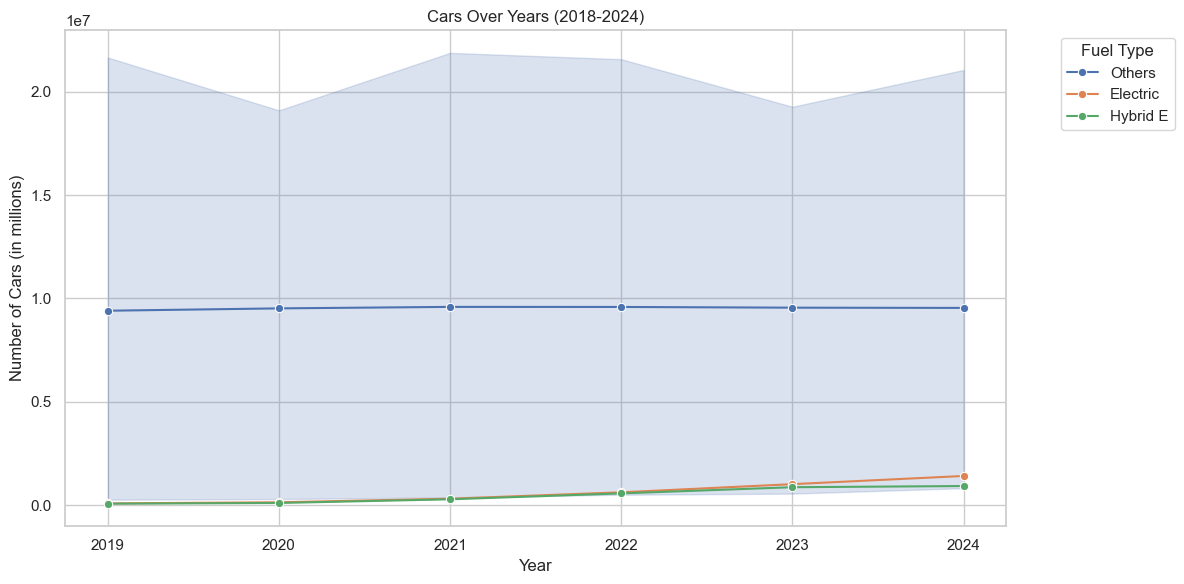

In [12]:
# Set the plot style
sns.set_style("whitegrid")

# Pivot the data to get years on x-axis and fuel types as separate lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="year", y="pkw", hue="fuel_type", marker="o")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cars (in millions)")
plt.title("Cars Over Years (2018-2024)")

# Move legend outside
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit legend
plt.tight_layout()
plt.show()